<a href="https://colab.research.google.com/github/lokeshcv/ComputerVisionDeepLearning/blob/main/pytorch_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

Load the Fashion MNIST dataset from the torchvision datasets

In [2]:
dir_path = '/content/data'

In [3]:
training_data = datasets.FashionMNIST(root=dir_path,
                                      train=True,download=True,
                                      transform=ToTensor())

100%|██████████| 26421880/26421880 [00:00<00:00, 116681982.93it/s]


Extracting /content/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6637083.56it/s]

Extracting /content/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 63973483.35it/s]


Extracting /content/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22055441.26it/s]


Extracting /content/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/FashionMNIST/raw



In [4]:
test_data = datasets.FashionMNIST(root=dir_path,
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

Dataloader is an iterable which wraps the dataset for batching, sampling and shuffling

Shape of X: torch.Size([128, 1, 28, 28])
Shape of y: torch.Size([128])


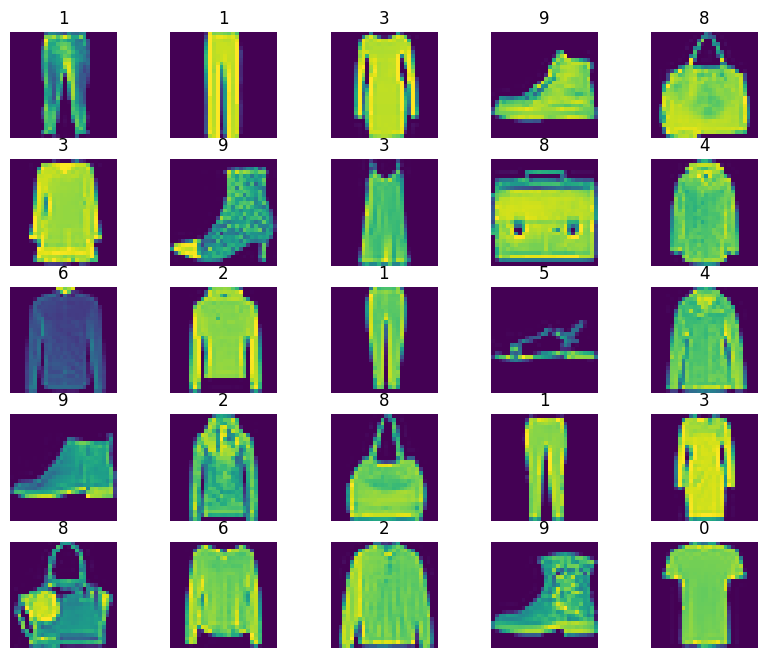

In [5]:
batch_size=128

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print("Shape of X:", X.shape)
  print("Shape of y:", y.shape)
  break

figure = plt.figure(figsize=(10,8))

cols, rows = 5,5

for i in range(1, cols * rows + 1):
  idx = torch.randint(len(test_data), size=(1,)).item()
  img, label = test_data[idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='viridis')
plt.show()

Feed forward network

In [6]:
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Define the Model

In [11]:
class Network(nn.Module):

  def __init__(self):
    super(Network, self).__init__()
    self.flatten = nn.Flatten()

    self.hdn_layers = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.LeakyReLU(),
        nn.Linear(512,512),
        nn.LeakyReLU(),
        nn.Linear(512,10),
        nn.LeakyReLU()
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.hdn_layers(x)

    return logits

In [12]:
model = Network().to(device)
print(model)

Network(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (hdn_layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
  )
)


In [14]:
loss_fn = nn.CrossEntropyLoss()
lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr =lr)
loss_fn,  optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [27]:
def train(train_loader, model, loss_function, optimizer, device):

  size = len(train_loader.dataset)

  for batch, (X, y) in enumerate(train_loader):

    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_function(pred, y)

    #Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:.7f} [{current:>5d}/{size:>5d}]")


def test(test_loader, model, loss_function, device):

  size= len(test_loader.dataset)
  model.eval()
  loss, correct= 0, 0

  with torch.no_grad():
    for X,y in test_loader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss += loss_function(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  loss /= size
  correct /= size

  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, \Avg loss: {loss:>8f} \n")

Train the model

In [28]:
epochs = 30
for i in range(epochs):
  print(f"Epoch : {i+1}")
  train(train_dataloader, model, loss_fn, optimizer, device)
  test(test_dataloader, model, loss_fn, device)

Epoch : 1
loss: 0.6622503 [    0/60000]
loss: 0.6145054 [12800/60000]
loss: 0.6706660 [25600/60000]
loss: 0.7060329 [38400/60000]
loss: 0.7312828 [51200/60000]
Test Error: 
 Accuracy: 73.0%, \Avg loss: 0.005783 

Epoch : 2
loss: 0.6498394 [    0/60000]
loss: 0.6019072 [12800/60000]
loss: 0.6582538 [25600/60000]
loss: 0.6954370 [38400/60000]
loss: 0.7219204 [51200/60000]
Test Error: 
 Accuracy: 73.4%, \Avg loss: 0.005704 

Epoch : 3
loss: 0.6374332 [    0/60000]
loss: 0.5905681 [12800/60000]
loss: 0.6465341 [25600/60000]
loss: 0.6854284 [38400/60000]
loss: 0.7131711 [51200/60000]
Test Error: 
 Accuracy: 73.9%, \Avg loss: 0.005629 

Epoch : 4
loss: 0.6258179 [    0/60000]
loss: 0.5799991 [12800/60000]
loss: 0.6354644 [25600/60000]
loss: 0.6759834 [38400/60000]
loss: 0.7049004 [51200/60000]
Test Error: 
 Accuracy: 74.3%, \Avg loss: 0.005558 

Epoch : 5
loss: 0.6147966 [    0/60000]
loss: 0.5701305 [12800/60000]
loss: 0.6250138 [25600/60000]
loss: 0.6670239 [38400/60000]
loss: 0.6970539 [5

Save Model

In [30]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Load the Model

In [31]:
model = Network()
model.load_state_dict(torch.load('data/model.pth'))

<All keys matched successfully>

Use it for the inference

In [32]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [33]:
model.eval()
x, y = test_data[0][0], test_data[0][1]

with torch.no_grad():
  pred=model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f"Predicted : {predicted} - Actual : {actual}")

Predicted : Ankle boot - Actual : Ankle boot
